         City       Year  Average Day Time (dB)  Average Night Time (dB)
0   Bengaluru  2011-2012                  60.00                    53.40
1   Bengaluru  2012-2013                  59.40                    52.20
2   Bengaluru  2013-2014                  60.40                    53.60
3   Bengaluru  2014-2015                  60.80                    54.80
4   Bengaluru  2019-2020                  63.90                    60.50
5   Bengaluru  2020-2021                  65.94                    66.74
6   Bengaluru  2022-2023                  64.87                    61.44
7     Chennai  2011-2012                  69.80                    59.40
8     Chennai  2012-2013                  69.40                    59.80
9     Chennai  2013-2014                  69.80                    60.20
10    Chennai  2014-2015                  69.80                    61.40
11    Chennai  2019-2020                  65.90                    62.60
12    Chennai  2020-2021                  71.79    

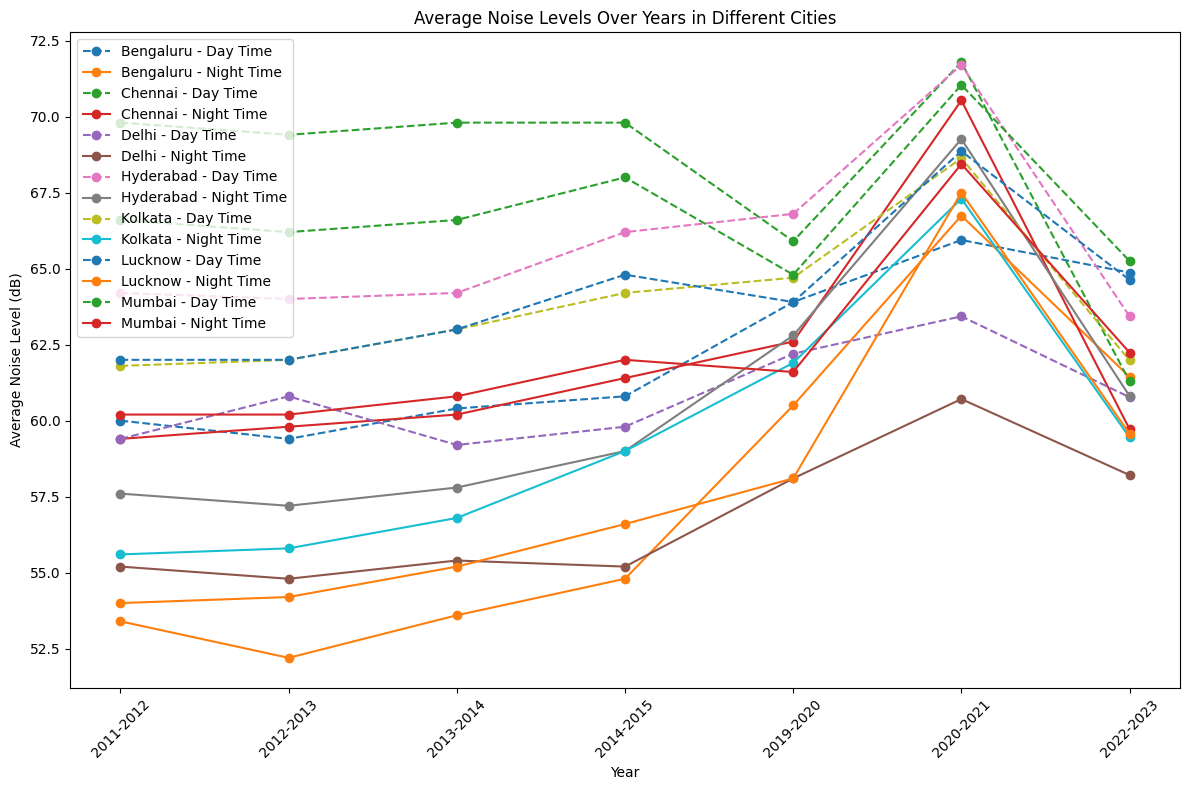

City: Bengaluru
  Day Time Noise Increase (from 2011-2012 to 2022-2023): 4.87 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 8.04 dB

City: Chennai
  Day Time Noise Increase (from 2011-2012 to 2022-2023): -8.51 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 0.32 dB

City: Delhi
  Day Time Noise Increase (from 2011-2012 to 2022-2023): 1.37 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 3.01 dB

City: Hyderabad
  Day Time Noise Increase (from 2011-2012 to 2022-2023): -0.77 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 3.21 dB

City: Kolkata
  Day Time Noise Increase (from 2011-2012 to 2022-2023): 0.18 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 3.85 dB

City: Lucknow
  Day Time Noise Increase (from 2011-2012 to 2022-2023): 2.63 dB
  Night Time Noise Increase (from 2011-2012 to 2022-2023): 5.57 dB

City: Mumbai
  Day Time Noise Increase (from 2011-2012 to 2022-2023): -1.35 dB
  Night Time Noise Increase (from 2

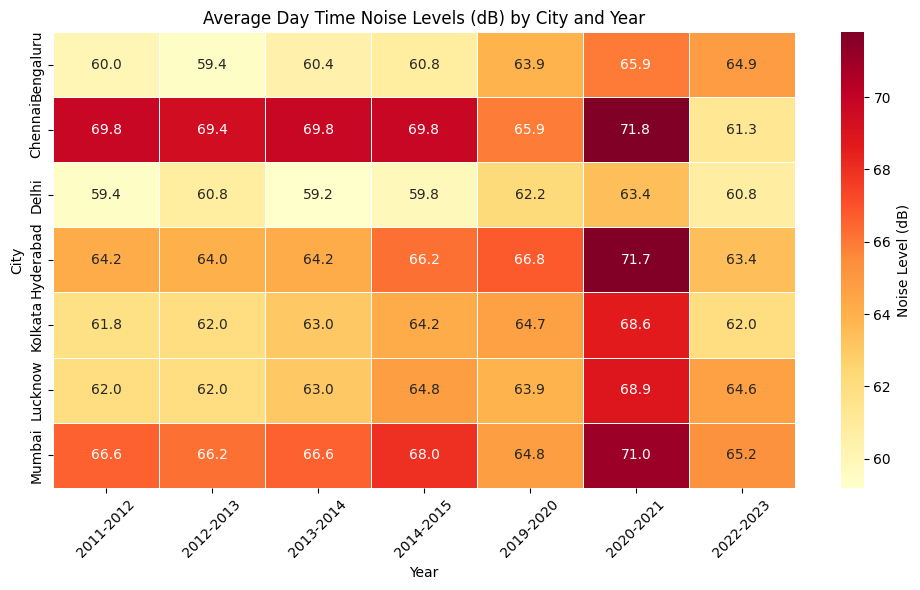

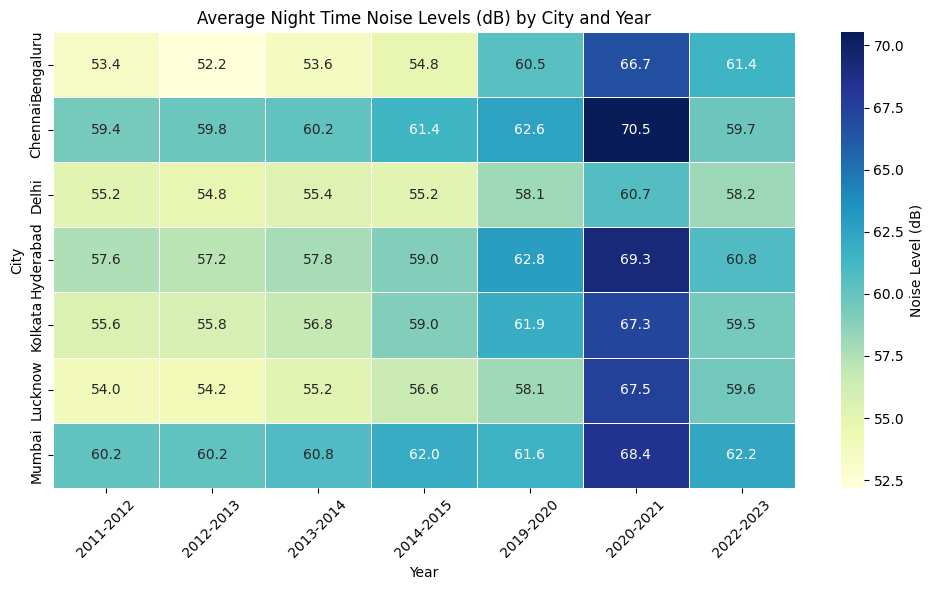

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Folder path containing all .ods files for each year
folder_path = "/mnt/windows/my codes/python/noise research/env research/"
# List of years for each file (assuming filenames include the year)
years = ["2011-2012", "2012-2013", "2013-2014","2014-2015","2019-2020", "2020-2021", "2022-2023" ]  # Add more years as needed

# Initialize an empty DataFrame to store data from all years
all_data = pd.DataFrame()

# Load data from each year's file and add a "Year" column
for year in years:
    ods_file_path = f"{folder_path}/{year}.ods"
    df = pd.read_excel(ods_file_path, engine='odf')
    df["City"] = df["City"].ffill()  # Forward fill the City column
    df["Year"] = year  # Add a column for the year
    all_data = pd.concat([all_data, df], ignore_index=True)

# Convert columns to numeric for analysis
all_data["Day Time db(A)"] = pd.to_numeric(all_data["Day Time db(A)"], errors='coerce')
all_data["Night Time db(A)"] = pd.to_numeric(all_data["Night Time db(A)"], errors='coerce')

# Group by both City and Year, then calculate average noise levels for each city-year combination
city_year_analysis = all_data.groupby(["City", "Year"]).agg({
    "Day Time db(A)": "mean",
    "Night Time db(A)": "mean"
}).reset_index()

# Rename columns for clarity
city_year_analysis.columns = ["City", "Year", "Average Day Time (dB)", "Average Night Time (dB)"]

# Display the DataFrame to review the calculated values
print(city_year_analysis)

# Plotting trends over years for each city
plt.figure(figsize=(12, 8))
cities = city_year_analysis["City"].unique()

for city in cities:
    city_data = city_year_analysis[city_year_analysis["City"] == city]
    plt.plot(city_data["Year"], city_data["Average Day Time (dB)"], marker='o', label=f"{city} - Day Time", linestyle='--')
    plt.plot(city_data["Year"], city_data["Average Night Time (dB)"], marker='o', label=f"{city} - Night Time")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Average Noise Level (dB)")
plt.title("Average Noise Levels Over Years in Different Cities")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Comment on trends in the analysis
for city in cities:
    city_data = city_year_analysis[city_year_analysis["City"] == city]
    start_year = city_data["Year"].iloc[0]
    end_year = city_data["Year"].iloc[-1]
    day_trend = city_data["Average Day Time (dB)"].iloc[-1] - city_data["Average Day Time (dB)"].iloc[0]
    night_trend = city_data["Average Night Time (dB)"].iloc[-1] - city_data["Average Night Time (dB)"].iloc[0]
    
    print(f"City: {city}")
    print(f"  Day Time Noise Increase (from {start_year} to {end_year}): {day_trend:.2f} dB")
    print(f"  Night Time Noise Increase (from {start_year} to {end_year}): {night_trend:.2f} dB")
    print()
# Pivot the data to get years as columns and cities as rows
# Create separate heatmaps for day and night noise levels
heatmap_data_day = city_year_analysis.pivot(index="City", columns="Year", values="Average Day Time (dB)")
heatmap_data_night = city_year_analysis.pivot(index="City", columns="Year", values="Average Night Time (dB)")


# Plot the heatmap for day-time noise levels
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_day, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Noise Level (dB)'})
plt.title("Average Day Time Noise Levels (dB) by City and Year")
plt.xlabel("Year")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the heatmap for night-time noise levels
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_night, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Noise Level (dB)'})
plt.title("Average Night Time Noise Levels (dB) by City and Year")
plt.xlabel("Year")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

